In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df['Gender'] = df['Gender'].replace('Male',1).replace("Female" , 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Text(0, 0.5, 'Count')

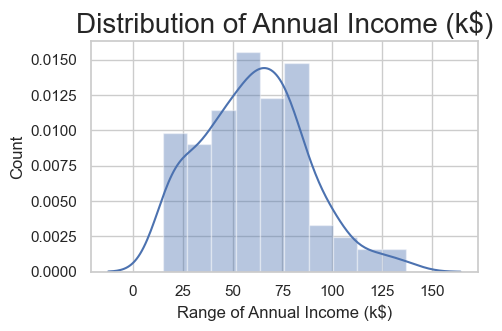

In [4]:
#Distribution of Annnual Income

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

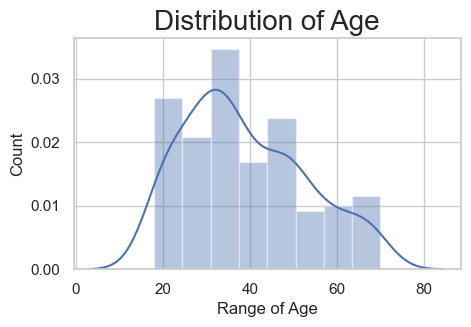

In [5]:
#Distribution of age

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

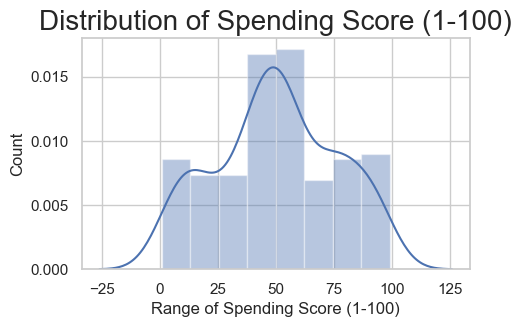

In [6]:
#Distribution of spending score

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

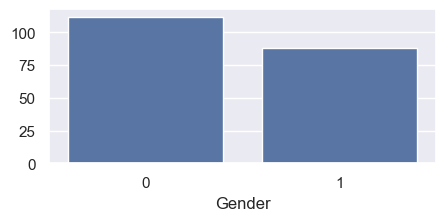

In [7]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,2))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

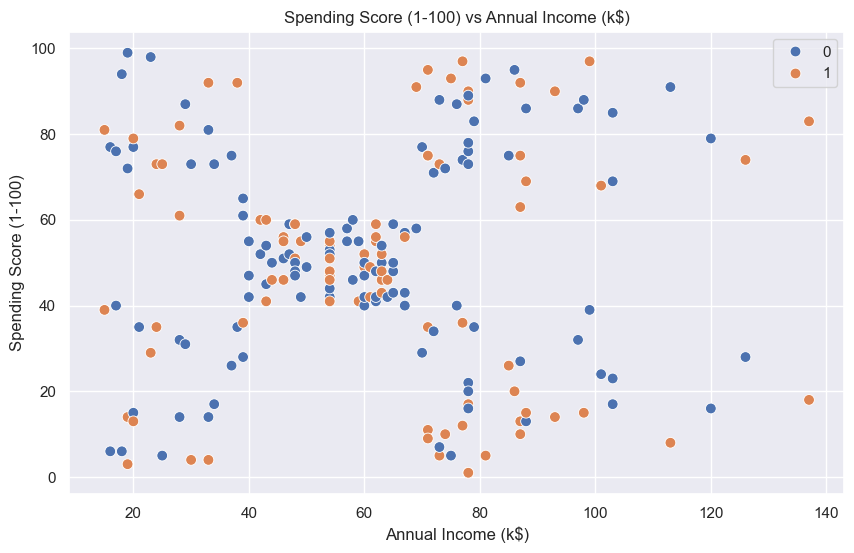

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

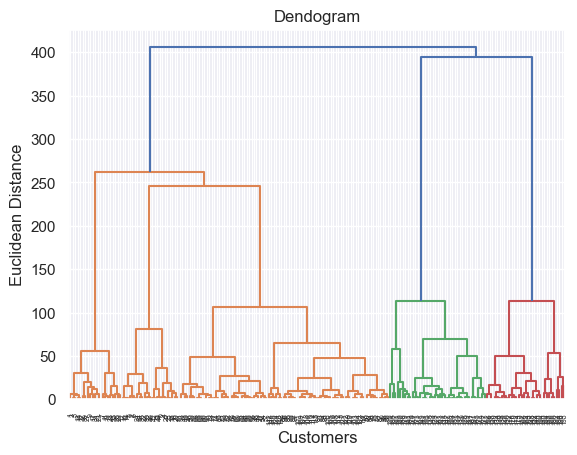

In [10]:
import scipy.cluster.hierarchy as sch

X = df[["Annual Income (k$)","Spending Score (1-100)"]]

data = sch.linkage(X, method = 'ward') # centroid distancing method

dendrogram = sch.dendrogram(data)

#plt.figure(figsize=(12,6))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")

plt.show()

<h3> Here the total height is 400 and a horizontal line is drawn at 200..and 5 clusters are optimal. </h3> 

In [11]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')
df['label'] = hc.fit_predict(X)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


In [12]:
df["label"].value_counts()

label
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

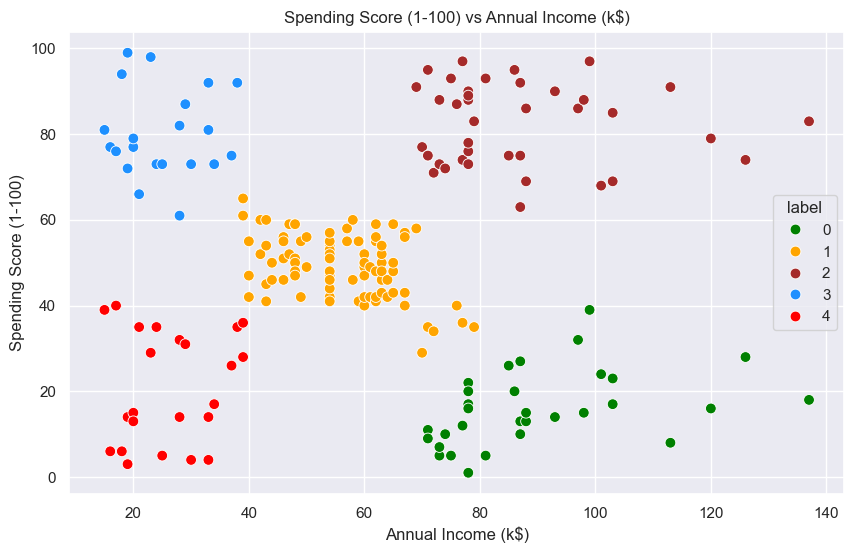

In [13]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [16]:
df['label'] = df['label'].replace({
    0: 'High-Income-High-Spend',
    1: 'Low-Income-High-Spend',
    2: 'High-Income-Low-Spend',
    3: 'Neutral',
    4: 'Low-Income-Low-Spend'
})   

In [17]:
df['label'] = df['label'].replace(0,'Female').replace(1 , 'Male')

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,Low-Income-Low-Spend
1,2,1,21,15,81,High-Income-Low-Spend
2,3,0,20,16,6,Low-Income-Low-Spend
3,4,0,23,16,77,High-Income-Low-Spend
4,5,0,31,17,40,Low-Income-Low-Spend


In [19]:
df_Low_Income_High_Spend = df[(df['label'] == 'Low-Income-High-Spend')] 
df_Low_Income_High_Spend

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
123,124,1,39,69,91,Low-Income-High-Spend
125,126,0,31,70,77,Low-Income-High-Spend
127,128,1,40,71,95,Low-Income-High-Spend
129,130,1,38,71,75,Low-Income-High-Spend
131,132,1,39,71,75,Low-Income-High-Spend
133,134,0,31,72,71,Low-Income-High-Spend
135,136,0,29,73,88,Low-Income-High-Spend
137,138,1,32,73,73,Low-Income-High-Spend
139,140,0,35,74,72,Low-Income-High-Spend
141,142,1,32,75,93,Low-Income-High-Spend


In [49]:
df_Low_Income_High_Spend.to_csv('df_Low_Income_High_Spend.csv')